
# 🐍 Python - 🖼️ Convert images into graphs for advanced visual analysis

## ❓ Have you ever wondered how to convert an image into a graph to analyze its structural components? 🤔

## 👉 **Solution:**
Using **skimage.feature**, we can transform an image into a graph that allows for advanced structural analysis of the image's edges. This technique helps to identify spatial relationships between pixels, which is crucial for areas like **computer vision**.

## 🔧 **How it works:**

1. We detect edges in an image using **Canny edge detection**.
2. We create a **graph** where each edge pixel is a node, and adjacent edge pixels are connected by edges.
3. This graph is useful for complex analysis like **component analysis** or **object segmentation** in images.

## 🔎 **Why it matters:**
**Graphs** allow us to structure images in a way that simplifies processing, making tasks like **network analysis** and **object tracking** easier. It’s crucial for building **artificial vision systems** that can learn patterns and structures.

## ✨ **Real-world example or case:**
Imagine you’re part of a team developing a security system to monitor moving objects. You can use this **graph** approach to represent the shape and edges of objects, then apply algorithms to track their movement and detect anomalies.

## ⚙️ **Business impact:**
Turning images into **graphs** makes **unstructured image analysis** easier. This is key for developing **intelligent systems** that can interpret visual data, such as in **security**, **medicine** (for detecting anomalies), and **autonomous vehicles**.

## 📊 **Summary of what the code does:**

- Load a sample image.
- Detect edges using the **Canny** method.
- Create a graph based on the detected edges.
- Visualize the original image and its graph representation.

## 🔗 [Github](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main)

## 💭 **Reflection:**
Have you ever worked with image analysis in your projects? How would you integrate a graph-based approach into your workflow?

## 🔑 #DataScience #MachineLearning #AI #ComputerVision #Python #DeepLearning #GraphAnalysis #EdgeDetection #PythonForDataScience


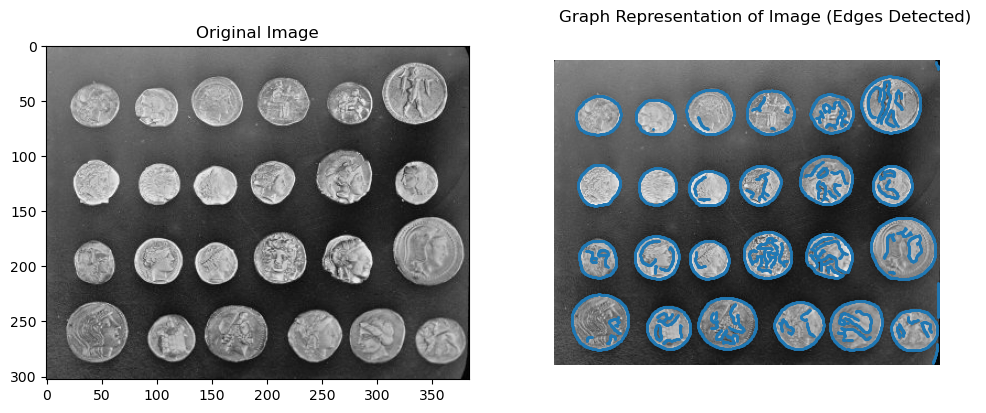

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from skimage import data, color, feature

# Load a sample image (coins dataset from skimage)
image = data.coins()

# Convert image to grayscale if not already
gray_image = color.rgb2gray(image) if len(image.shape) == 3 else image

# Extract edges using Canny edge detection from skimage.feature
edges = feature.canny(gray_image, sigma=2)

# Create an empty graph
graph = nx.Graph()

# Get the dimensions of the image
height, width = edges.shape

# Add nodes: Each pixel that is an edge becomes a node
for y in range(height):
    for x in range(width):
        if edges[y, x]:  # If it's an edge pixel
            graph.add_node((y, x))

# Add edges: Connect each node to its adjacent edge pixels
for y in range(height - 1):
    for x in range(width - 1):
        if edges[y, x]:
            # Connect horizontally and vertically
            if edges[y + 1, x]:
                graph.add_edge((y, x), (y + 1, x))
            if edges[y, x + 1]:
                graph.add_edge((y, x), (y, x + 1))

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original grayscale image
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Original Image")

# Graph representation overlaying edges
ax[1].imshow(gray_image, cmap="gray")
nx.draw(graph, pos={node: node[::-1] for node in graph.nodes()}, node_size=1, edge_color="red", ax=ax[1])
ax[1].set_title("Graph Representation of Image (Edges Detected)")

plt.show()
